In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [4]:
data=pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
data.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
Small           14951
Large           14951
XLarge          14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [6]:
data.drop("Unnamed: 0", axis=1,inplace=True)
data

,Date,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data=data.dropna()
data.tail(20)

,Date,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1497,31-01-2016,0.88,6506673.96,2126066.85,2069192.92,287234.03,2024180.16,1874982.24,134692.75,14505.17,conventional,2016.0,California
1498,24-01-2016,0.88,6246380.73,1230068.19,2457751.77,272665.17,2285895.60,2122673.09,147881.99,15340.52,conventional,2016.0,California
1499,17-01-2016,0.90,6000013.23,1653347.69,2336705.19,250106.17,1759854.18,1579233.60,162289.68,18330.90,conventional,2016.0,California
1500,10-01-2016,0.87,6303406.82,1736168.01,2173554.18,261931.07,2131753.56,1793640.16,321613.97,16499.43,conventional,2016.0,California
1501,03-01-2016,0.73,7730431.28,2315175.35,2856102.41,257268.16,2301885.36,1950428.50,340852.13,10604.73,conventional,2016.0,California
1502,25-12-2016,1.25,155793.03,36125.58,50792.48,7324.64,61550.33,51247.91,10232.98,69.44,conventional,2016.0,Charlotte
1503,18-12-2016,1.24,144634.01,35761.88,46276.63,7942.68,54652.82,44604.56,10048.26,0.00,conventional,2016.0,Charlotte
1504,11-12-2016,1.33,145815.04,43744.87,40971.14,8696.54,52402.49,46293.11,6109.38,0.00,conventional,2016.0,Charlotte
1505,04-12-2016,1.34,154742.81,39221.82,46285.90,9451.98,59783.11,48016.74,11766.37,0.00,conventional,2016.0,Charlotte
1506,27-11-2016,1.54,131453.85,38976.01,34346.09,8265.03,49866.72,44005.31,5861.41,0.00,conventional,2016.0,Charlotte


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['type'].astype(str))
data['type']= le.transform(data['type'].astype(str))


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   Small         1517 non-null   float64
 4   Large         1517 non-null   float64
 5   XLarge        1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   int32  
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), int32(1), object(2)
memory usage: 160.0+ KB


In [11]:
data.describe()

,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000


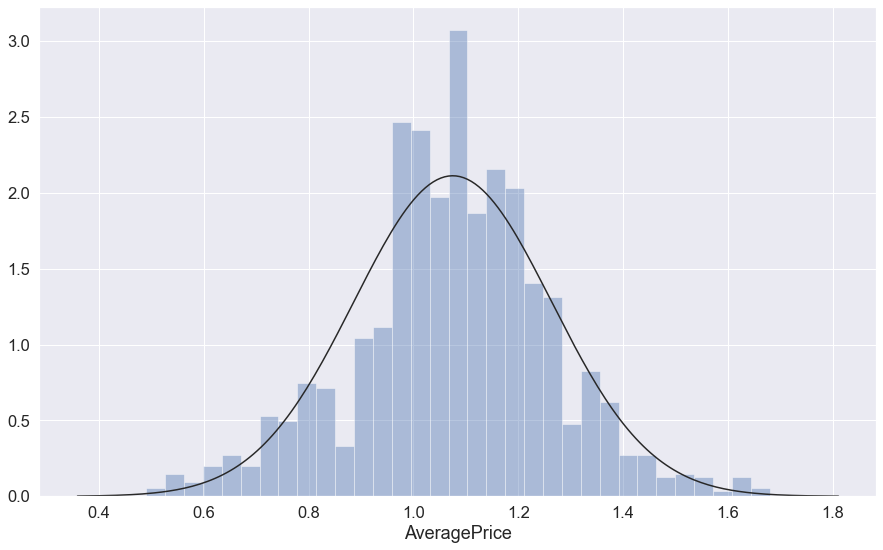

In [12]:
sns.set(font_scale=1.5)
from scipy.stats import norm
fig, ax=plt.subplots(figsize=(15,9))
sns.distplot(a=data.AveragePrice, kde=False, fit=norm)

In [15]:
region_list=list(data.region.unique())
region_list

['Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Midsouth',
 'Nashville',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'TotalUS',
 'West',
 'WestTexNewMexico']

Text(0.5, 1.0, 'Average price of Avocado According to Region')

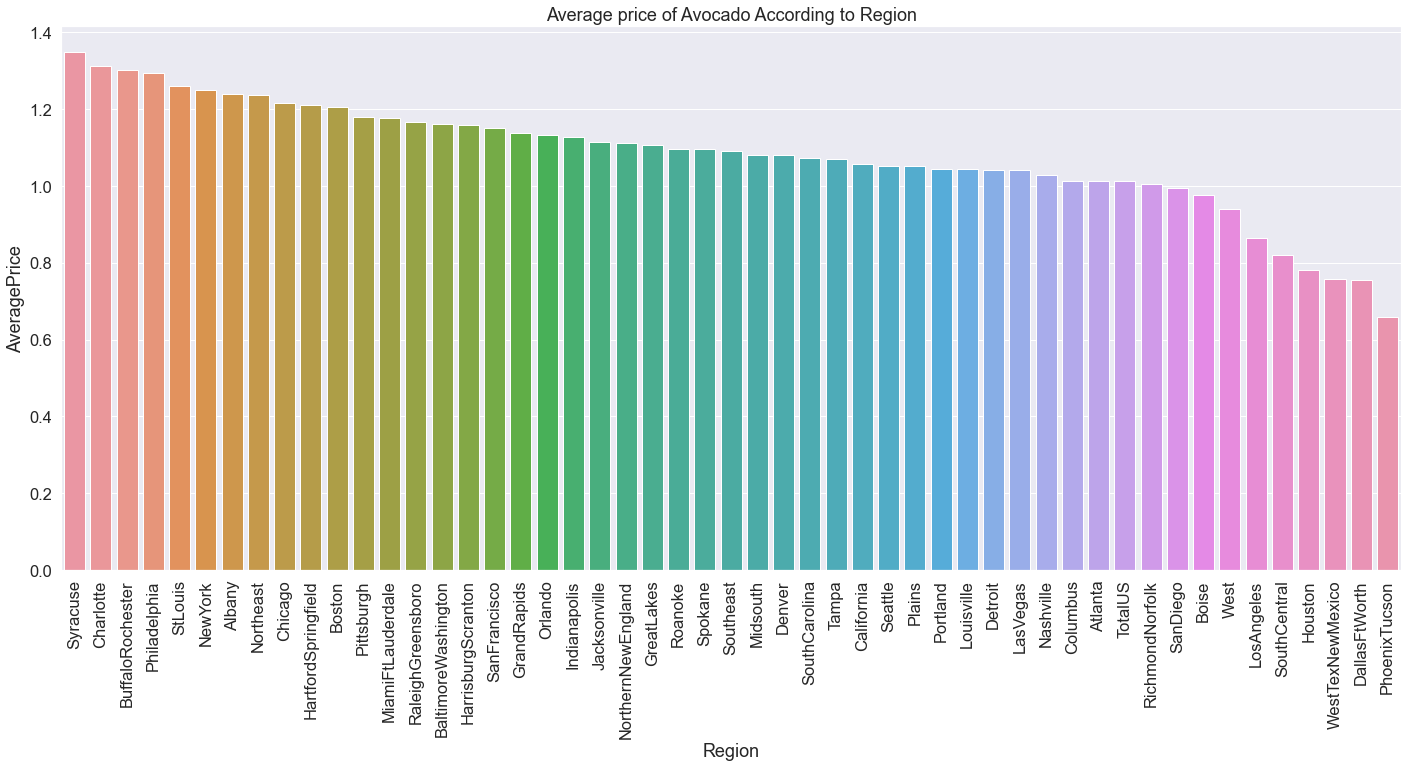

In [16]:
average_price=[]

for i in region_list:
    x=data[data.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)
df2=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df2.average_price.sort_values(ascending=False).index.values
sorted_data=df2.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list, y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('AveragePrice')
plt.title("Average price of Avocado According to Region")

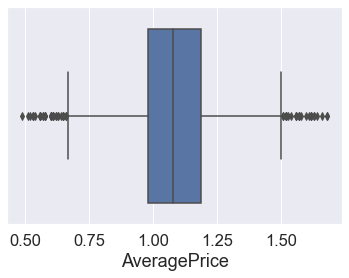

In [17]:
ax=sns.boxplot(x=data['AveragePrice'])


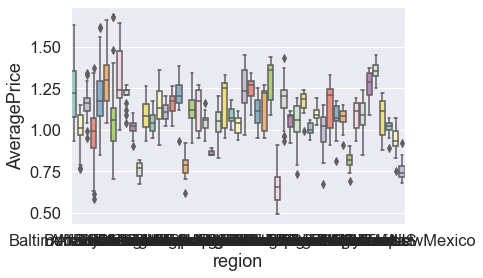

In [18]:
#find the skewness
ax=sns.boxplot(x='region',y="AveragePrice",data=data, palette="Set3")


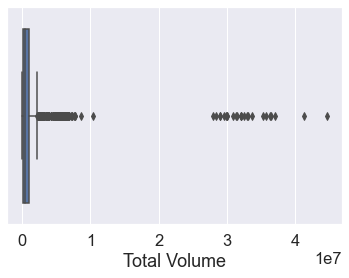

In [19]:
ax=sns.boxplot(x=data['Total Volume'])

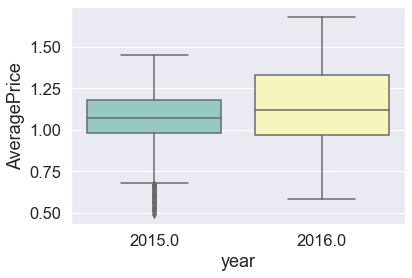

In [20]:
ax=sns.boxplot(x='year',y="AveragePrice",data=data, palette="Set3")

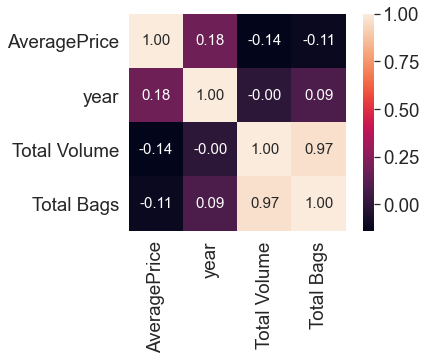

In [23]:
cols = ['AveragePrice','year','Total Volume','Total Bags']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)


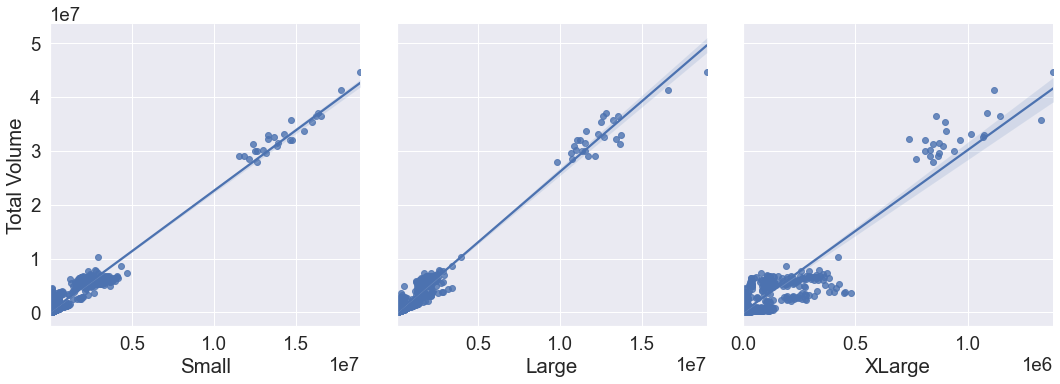

In [24]:
# Total Volume vs Small, Large and XLarge¶
sns.pairplot(data, x_vars=['Small', 'Large', 'XLarge'], y_vars='Total Volume', size=5, aspect=1, kind='reg')


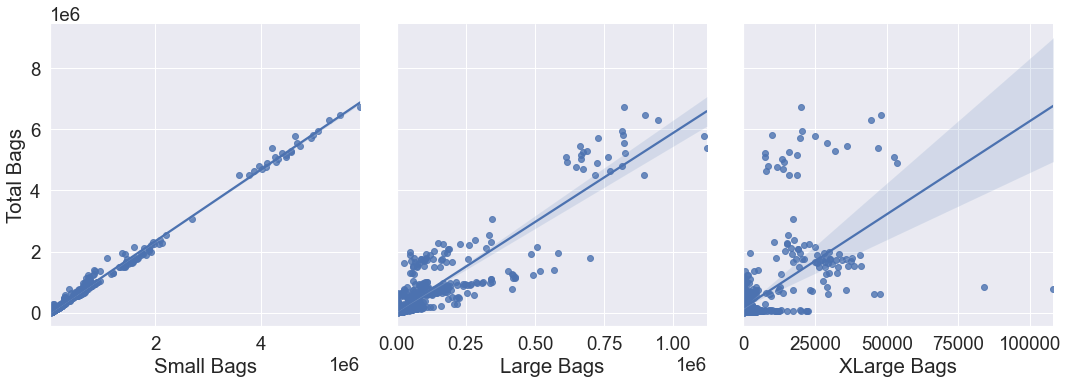

In [25]:
#Total Bags vs Small Bags, Large Bags and XLarge Bags¶
sns.pairplot(data, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=5, aspect=1, kind='reg')

In [27]:
collist=data.columns.values
ncol=1
nrow=10

In [40]:
data.drop(['region'], axis = 1,inplace = True)

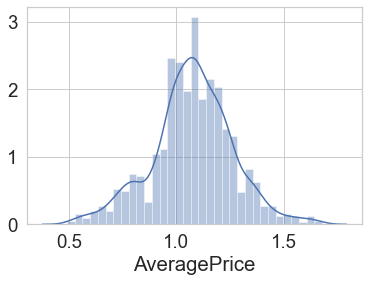

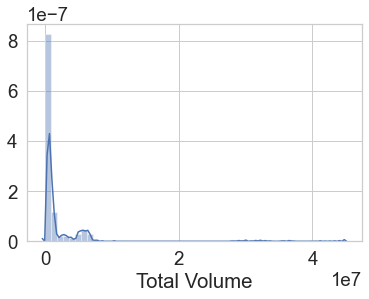

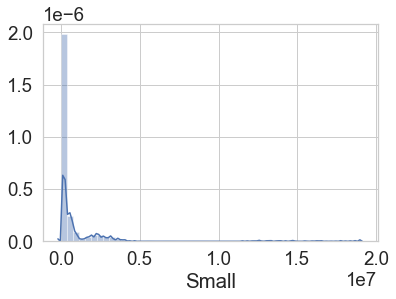

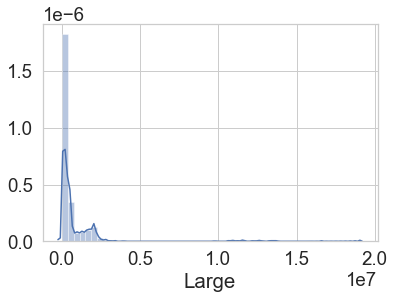

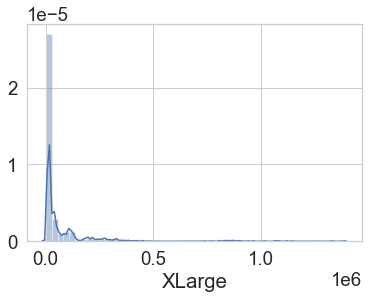

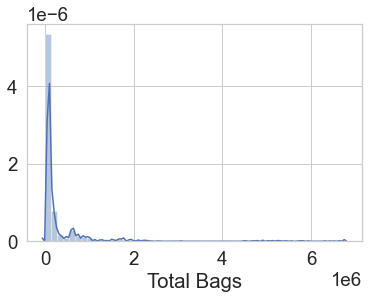

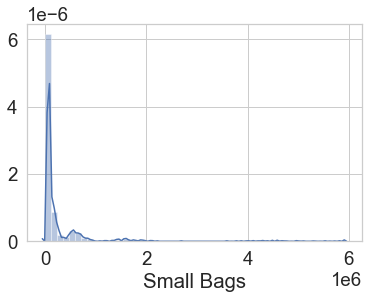

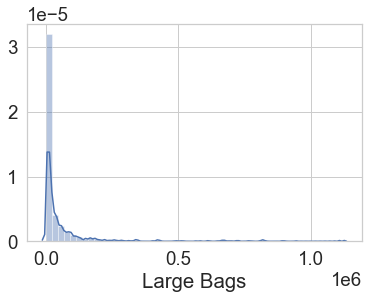

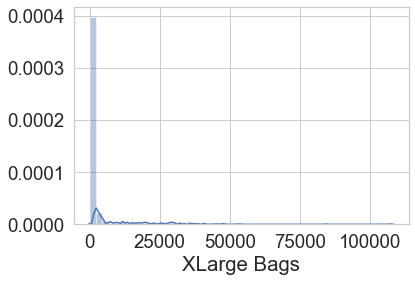

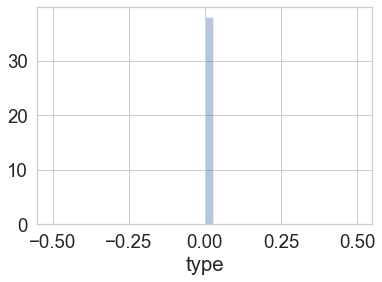

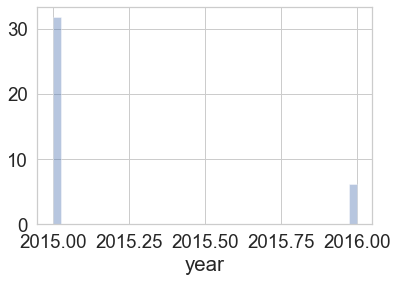

ValueError: could not convert string to float: 'Albany'

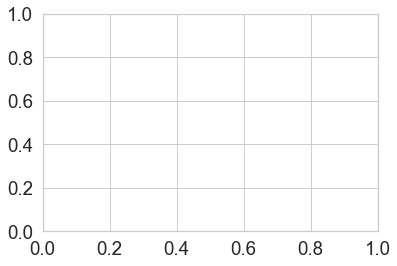

In [35]:
for i in data.columns:
    sns.distplot(data[i])
    plt.show()

In [41]:
data.skew()

AveragePrice   -0.109444
Total Volume    0.667468
Small          -0.160268
Large           0.184436
XLarge         -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
dtype: float64

In [42]:
#Treating skewness via log method
for col in data.columns:
    if data[col].skew()>0.55:
        data[col]=np.log1p(data[col])


In [43]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.35048079, 1.4442061 , 1.82816171, ..., 0.90242046,        nan,
        0.44100815],
       [1.45639674, 1.57536711, 2.01206913, ..., 0.90242046,        nan,
        0.44100815],
       [0.76783831, 0.95182902, 1.94183376, ..., 0.90242046,        nan,
        0.44100815],
       ...,
       [2.14485045, 0.63283398, 0.20190426, ..., 1.1897332 ,        nan,
        2.26753179],
       [2.09189247, 0.58841602, 0.13577946, ..., 0.90242046,        nan,
        2.26753179],
       [1.88006056, 0.61356798, 0.23299293, ..., 0.90242046,        nan,
        2.26753179]])

In [44]:
threshold=3
print(np.where(z>3))

(array([ 760, 1346, 1411, 1457, 1458], dtype=int64), array([0, 4, 0, 0, 0], dtype=int64))


In [45]:
df_new=data[(z>3).all(axis=1)]

In [47]:
print(data.shape,'\t', df_new.shape)

(1517, 11) 	 (0, 11)


In [49]:
data.drop(['Total Volume', 'Total Bags', 'year'], axis = 1,inplace = True)
data.columns


Index(['AveragePrice', 'Small', 'Large', 'XLarge', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type'],
      dtype='object')

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data)
data_avocado_scaler = scaler.transform(data)
data_avocado = pd.DataFrame(data_avocado_scaler)
data_avocado.columns = ['AveragePrice', 'Small', 'Large', 'XLarge', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type']
data_avocado.head()


,AveragePrice,Small,Large,XLarge,Small Bags,Large Bags,XLarge Bags,type
0,1.350481,-1.828162,-0.567524,-1.810613,-1.679192,-0.966743,-0.90242,0.0
1,1.456397,-2.012069,-0.684233,-1.737594,-1.599620,-0.953861,-0.90242,0.0
2,-0.767838,-1.941834,-0.159241,-1.428526,-1.739733,-0.937531,-0.90242,0.0
3,0.026531,-1.790572,-0.403726,-1.654003,-2.058774,-0.862073,-0.90242,0.0
4,1.085691,-1.869374,-0.694856,-1.637471,-2.009503,-0.748414,-0.90242,0.0


In [56]:
feature_cols = ['Small', 'Large', 'XLarge', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type']
X = data_avocado[feature_cols]
y = data_avocado.AveragePrice

In [58]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)


In [59]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1213, 7)
y_train shape:  (1213,)

Test cases as below
X_test shape:  (304, 7)
y_test shape:  (304,)


In [66]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Import Error matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [60]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [61]:
linreg = linear_reg(X,y)
linreg.score(X,y)

0.31283718661856363

In [62]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)


Intercept: 0.005392512026968688
Coefficients: [-0.64228781 -0.15664768 -0.09033728  0.40217174  0.04345616  0.03267845
  0.        ]


In [63]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.005392512026968688
Small -0.6422878094038317
Large -0.15664768342843416
XLarge -0.09033728279395763
Small Bags 0.40217173757646313
Large Bags 0.04345616437178415
XLarge Bags 0.03267845108531268
type 0.0


In [64]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)


In [73]:
#using algorithem via for Loop

from sklearn.metrics import mean_absolute_error

model=[LinearRegression(),DecisionTreeRegressor(), KNeighborsRegressor(), SVR(), Lasso(), Ridge(), ElasticNet()]
for m in model:
    m.fit(X_train, y_train)
    print('score of:',m, "is:", m.score(X_train, y_train))
    predm=m.predict(X_train)
    print('Error:')
    print('Mean absoult error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2-score(y_test,predm))
    print('----------------------------------------------------------------------')
    print('\n')

score of: LinearRegression() is: 0.2937075764254554
Error:


ValueError: Found input variables with inconsistent numbers of samples: [304, 1213]

In [75]:
import sklearn.metrics as metrics

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 0.6516867411503683
MAE for test set is 0.5951901537809775
----------------------------------------------------------------------------------------
MSE for training set is 0.7038797943002156
MSE for test set is 0.6204598599127557
----------------------------------------------------------------------------------------
RMSE for training set is 0.8389754432045169
RMSE for test set is 0.7876927446109655


# Model Evaluation for Linear Regression Model
We are calculating Linear Regression model with same type of data.

In [76]:
print("Model Evaluation for Linear Regression Model")

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Linear Regression Model
----------------------------------------------------------------------------------------
r_squared for train data  0.2937075764254571  and adjusted_r_squared for train data 0.2896046328860199
----------------------------------------------------------------------------------------
r_squared for test data  0.38544229906393745  and adjusted_r_squared for test data 0.3709088399201793


In [78]:
#Evaluation of Linear Regression Model using different columns¶
feature_cols = ['Small', 'Small Bags', 'type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)


Mean cross-validated score of the best_estimator :  0.2706753103396987
RMSE for the test set is 0.6171958945762561


In [79]:
feature_cols = ['Large', 'Large Bags', 'type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)


Mean cross-validated score of the best_estimator :  0.03091981279115885
RMSE for the test set is 0.9417681649216665


In [82]:
feature_cols = ['XLarge', 'XLarge Bags', 'type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.07789775632555095
RMSE for the test set is 0.9047591210113655


In [83]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state = 0)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test) 


In [84]:
#Model Evaluation for Random Forest Regressor
print("Model Evaluation for Random Forest Regressor ")
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Random Forest Regressor 
RMSE for training set is 0.17509310477292694  and RMSE for test set is 0.40171199886058306
----------------------------------------------------------------------------------------
r_squared for train data  0.9692373222128168  and adjusted_r_squared for train data 0.969058617860526
----------------------------------------------------------------------------------------
r_squared for test data  0.8401625351516927  and adjusted_r_squared for test data 0.8363825951046043
